Average test MAE loss: 0.2752437567665377


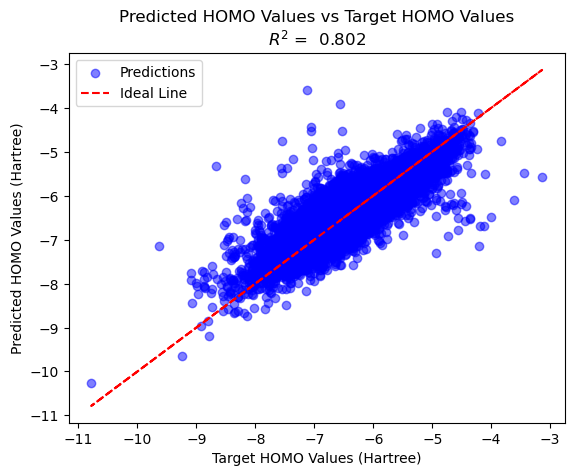

In [3]:
import os
import torch
import torch.nn as nn
import numpy as np
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import saveModel, mse, mae, test
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    test_loss = 0.0
    
    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            targets = batch["targets"][:, 2].to(device).unsqueeze(dim=-1)
            outputs = model(batch)
            loss = mae(outputs, targets)
            test_loss += loss.item()
    avg_test_loss = test_loss / (batch_num + 1)
    print(f"Average test MAE loss: {avg_test_loss}")

# Load the pre-trained model with map_location
best_model_homo = PaiNN(r_cut=5, device=device).to(device)
best_model_homo.load_state_dict(torch.load("./HOMO_best_PaiNNModel.pth", map_location='cpu'))
test(best_model_homo, DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Plotting the predicted outputs vs target values
def plot_predictions(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    predictions = []
    targets = []

    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            target_batch = batch["targets"][:, 2].cpu().numpy()
            output_batch = model(batch).cpu().numpy()

            targets.extend(target_batch)
            predictions.extend(output_batch)

    plt.scatter(targets, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot(targets, targets, color='red', linestyle='--', label='Ideal Line')  # Ideal line
    plt.xlabel("Target HOMO Values (Hartree)")
    plt.ylabel("Predicted HOMO Values (Hartree)")
    
    # Calculate and display correlation
    targets = np.array(targets)
    predictions = np.array(predictions) 
    correlation = np.corrcoef(targets.ravel(), predictions.ravel())[0, 1]
    plt.title(f"Predicted HOMO Values vs Target HOMO Values\n$R^2$ = {correlation: .3f}")   
    #text_x = np.min(targets) + 0.1 * (np.max(targets) - np.min(targets))
    #text_y = np.max(predictions) - 0.1 * (np.max(predictions) - np.min(predictions))
    #plt.text(text_x, text_y, f'Correlation: {correlation:.2f}', ha='left', va='top')

    #plt.suptitle(f'$R^2$ = {correlation:.3f}', fontsize=14,y=0.92)
    plt.legend()
    

# Plotting and saving the plot
plot_predictions(best_model_homo, DataLoaderQM9(r_cut=5, batch_size=100).get_test())
plt.savefig("predicted_vs_target_plot_homo.png")
plt.show()

Average test MAE loss: 0.2240467462830871


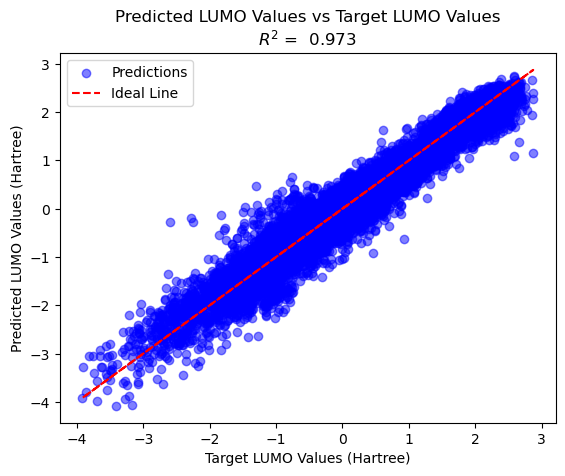

In [4]:
import os
import torch
import torch.nn as nn
import numpy as np
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import saveModel, mse, mae, test
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    test_loss = 0.0
    
    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            targets = batch["targets"][:, 3].to(device).unsqueeze(dim=-1)
            outputs = model(batch)
            loss = mae(outputs, targets)
            test_loss += loss.item()
    avg_test_loss = test_loss / (batch_num + 1)
    print(f"Average test MAE loss: {avg_test_loss}")

# Load the pre-trained model with map_location
best_model_lumo = PaiNN(r_cut=5, device=device).to(device)
best_model_lumo.load_state_dict(torch.load("./LUMO_best_model.pth", map_location='cpu'))
test(best_model_lumo, DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Plotting the predicted outputs vs target values
def plot_predictions(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    predictions = []
    targets = []

    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            target_batch = batch["targets"][:, 3].cpu().numpy()
            output_batch = model(batch).cpu().numpy()

            targets.extend(target_batch)
            predictions.extend(output_batch)

    plt.scatter(targets, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot(targets, targets, color='red', linestyle='--', label='Ideal Line')  # Ideal line
    plt.xlabel("Target LUMO Values (Hartree)")
    plt.ylabel("Predicted LUMO Values (Hartree)")
    #plt.title("Predicted LUMO Values vs Target LUMO Values")
    
    # Calculate and display correlation
    targets = np.array(targets)
    predictions = np.array(predictions) 
    correlation = np.corrcoef(targets.ravel(), predictions.ravel())[0, 1]   
    plt.title(f"Predicted LUMO Values vs Target LUMO Values\n$R^2$ = {correlation: .3f}")   

    #text_x = np.min(targets) + 0.1 * (np.max(targets) - np.min(targets))
    #text_y = np.max(predictions) - 0.1 * (np.max(predictions) - np.min(predictions))
    #plt.text(text_x, text_y, f'Correlation: {correlation:.2f}', ha='left', va='top')

    plt.legend()
    

# Plotting and saving the plot
plot_predictions(best_model_lumo, DataLoaderQM9(r_cut=5, batch_size=100).get_test())
plt.savefig("predicted_vs_target_plot_lumo.png")
plt.show()

Average test MAE loss: 0.23948909353663902


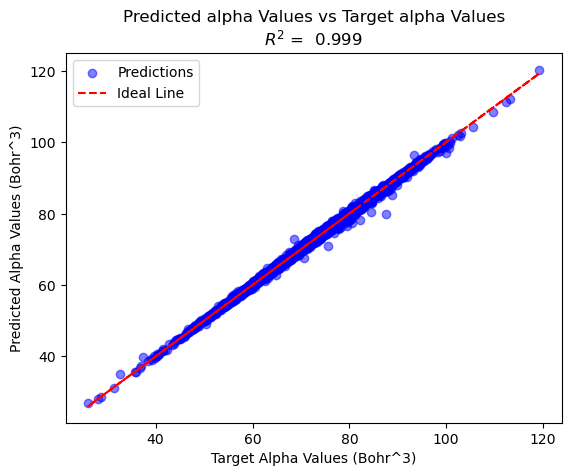

In [5]:
import os
import torch
import torch.nn as nn
import numpy as np
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import saveModel, mse, mae, test
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    test_loss = 0.0
    
    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            targets = batch["targets"][:, 1].to(device).unsqueeze(dim=-1)
            outputs = model(batch)
            loss = mae(outputs, targets)
            test_loss += loss.item()
    avg_test_loss = test_loss / (batch_num + 1)
    print(f"Average test MAE loss: {avg_test_loss}")

# Load the pre-trained model with map_location
best_model_alpha = PaiNN(r_cut=5, device=device).to(device)
best_model_alpha.load_state_dict(torch.load("./alpha_best_model.pth", map_location='cpu'))
test(best_model_alpha, DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Plotting the predicted outputs vs target values
def plot_predictions(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    predictions = []
    targets = []

    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            target_batch = batch["targets"][:, 1].cpu().numpy()
            output_batch = model(batch).cpu().numpy()

            targets.extend(target_batch)
            predictions.extend(output_batch)

    plt.scatter(targets, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot(targets, targets, color='red', linestyle='--', label='Ideal Line')  # Ideal line
    plt.xlabel("Target Alpha Values (Bohr^3)")
    plt.ylabel("Predicted Alpha Values (Bohr^3)")
    #plt.title("Predicted Alpha Values vs Target Alpha Values")
    
    # Calculate and display correlation
    targets = np.array(targets)
    predictions = np.array(predictions) 
    correlation = np.corrcoef(targets.ravel(), predictions.ravel())[0, 1]   
    #text_x = np.min(targets) + 0.1 * (np.max(targets) - np.min(targets))
    #text_y = np.max(predictions) - 0.1 * (np.max(predictions) - np.min(predictions))
    #plt.text(text_x, text_y, f'Correlation: {correlation:.2f}', ha='left', va='top')
    plt.title(f"Predicted alpha Values vs Target alpha Values\n$R^2$ = {correlation: .3f}")   

    plt.legend()
    

# Plotting and saving the plot
plot_predictions(best_model_alpha, DataLoaderQM9(r_cut=5, batch_size=100).get_test())
plt.savefig("predicted_vs_target_plot_alpha.png")
plt.show()

Average test MAE loss: 0.024908046899292307


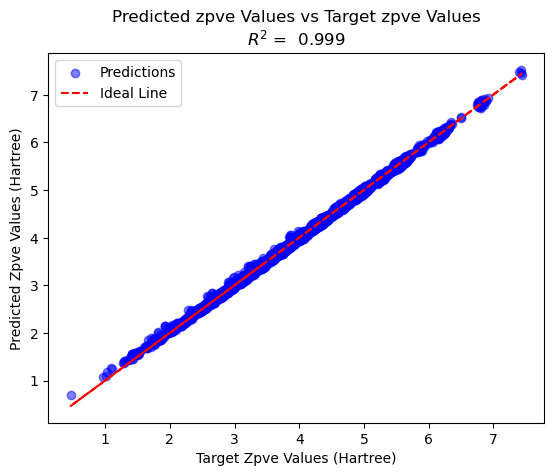

In [6]:
import os
import torch
import torch.nn as nn
import numpy as np
from Dataloader import DataLoaderQM9
from Model import PaiNN
from Training import Trainer
from Model import saveModel, mse, mae, test
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def test(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    test_loss = 0.0
    
    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            targets = batch["targets"][:, 6].to(device).unsqueeze(dim=-1)
            outputs = model(batch)
            loss = mae(outputs, targets)
            test_loss += loss.item()
    avg_test_loss = test_loss / (batch_num + 1)
    print(f"Average test MAE loss: {avg_test_loss}")

# Load the pre-trained model with map_location
best_model_zpve = PaiNN(r_cut=5, device=device).to(device)
best_model_zpve.load_state_dict(torch.load("./zpve_best_model.pth", map_location='cpu'))
test(best_model_zpve, DataLoaderQM9(r_cut=5, batch_size=100).get_test())

# Plotting the predicted outputs vs target values
def plot_predictions(model, test_set):
    model.eval()
    device = next(model.parameters()).device

    predictions = []
    targets = []

    with torch.no_grad():
        for batch_num, batch in enumerate(test_set):
            target_batch = batch["targets"][:, 6].cpu().numpy()
            output_batch = model(batch).cpu().numpy()

            targets.extend(target_batch)
            predictions.extend(output_batch)

    plt.scatter(targets, predictions, alpha=0.5, color='blue', label='Predictions')
    plt.plot(targets, targets, color='red', linestyle='--', label='Ideal Line')  # Ideal line
    plt.xlabel("Target Zpve Values (Hartree)")
    plt.ylabel("Predicted Zpve Values (Hartree)")
    #plt.title("Predicted Zpve Values vs Target Zpve Values")
    
    # Calculate and display correlation
    targets = np.array(targets)
    predictions = np.array(predictions) 
    correlation = np.corrcoef(targets.ravel(), predictions.ravel())[0, 1]   
    #text_x = np.min(targets) + 0.1 * (np.max(targets) - np.min(targets))
    #text_y = np.max(predictions) - 0.1 * (np.max(predictions) - np.min(predictions))
    #plt.text(text_x, text_y, f'Correlation: {correlation:.2f}', ha='left', va='top')
    plt.title(f"Predicted zpve Values vs Target zpve Values\n$R^2$ = {correlation: .3f}")   

    plt.legend()
    

# Plotting and saving the plot
plot_predictions(best_model_zpve, DataLoaderQM9(r_cut=5, batch_size=100).get_test())
plt.savefig("predicted_vs_target_plot_zpve.png")
plt.show()
